<a href="https://colab.research.google.com/github/AnSaradar/credit_card_customer_segmentation/blob/main/Credit_Card_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraires


In [5]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.cluster import DBSCAN, KMeans
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

#Loading the data

In [6]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/Credit_Card_Customer_Segmentation/CC GENERAL.csv')

In [7]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [8]:
data.shape

(8950, 18)

In [9]:
data.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [11]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [12]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [13]:
unique_customer_count = data['CUST_ID'].nunique()
print(f"Number of unique customers: {unique_customer_count}")

Number of unique customers: 8950


In [14]:
unique_tenurs_count = data['TENURE'].nunique()
print(f"Number of unique tenurs: {unique_tenurs_count}")

Number of unique tenurs: 7


In [15]:
def calculate_missing_percentage(data):

    total_rows = len(data)
    missing_percentages = (data.isnull().sum() / total_rows) * 100
    missing_data_info = pd.DataFrame({
        'Column': data.columns,
        'Missing Percentage': missing_percentages
    })

    print("Missing Data Percentage for each column:")
    print(missing_data_info)

calculate_missing_percentage(data)

Missing Data Percentage for each column:
                                                            Column  \
CUST_ID                                                    CUST_ID   
BALANCE                                                    BALANCE   
BALANCE_FREQUENCY                                BALANCE_FREQUENCY   
PURCHASES                                                PURCHASES   
ONEOFF_PURCHASES                                  ONEOFF_PURCHASES   
INSTALLMENTS_PURCHASES                      INSTALLMENTS_PURCHASES   
CASH_ADVANCE                                          CASH_ADVANCE   
PURCHASES_FREQUENCY                            PURCHASES_FREQUENCY   
ONEOFF_PURCHASES_FREQUENCY              ONEOFF_PURCHASES_FREQUENCY   
PURCHASES_INSTALLMENTS_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY   
CASH_ADVANCE_FREQUENCY                      CASH_ADVANCE_FREQUENCY   
CASH_ADVANCE_TRX                                  CASH_ADVANCE_TRX   
PURCHASES_TRX                                    

#Data Preprocessing

In [16]:
data.dropna(inplace=True)

In [17]:
data.drop(['CUST_ID'],axis=1,inplace=True)

In [18]:
data.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

#Data Visualization

##2D

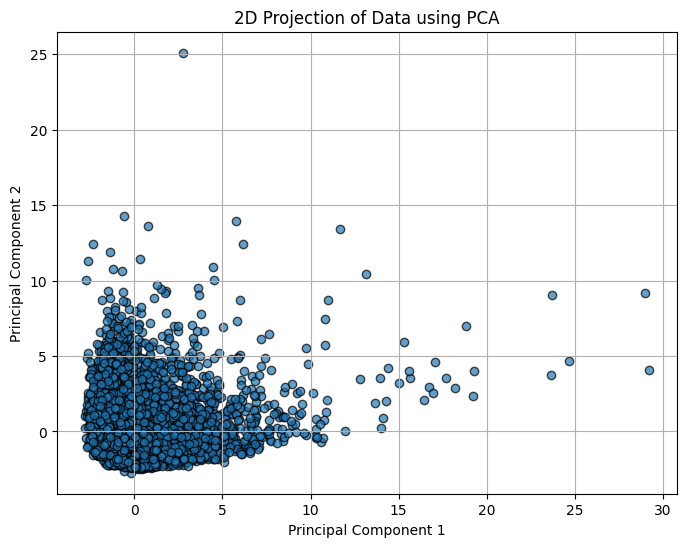

In [24]:
# Standardize the data (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

# Apply PCA with n_components=2
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Create a DataFrame or array with the principal components
# This will have shape (number of samples, 2)
# For example, if using pandas DataFrame:
# pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Visualize the 2D projection
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], marker='o', edgecolors='k', alpha=0.7)
plt.title('2D Projection of Data using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

##3D

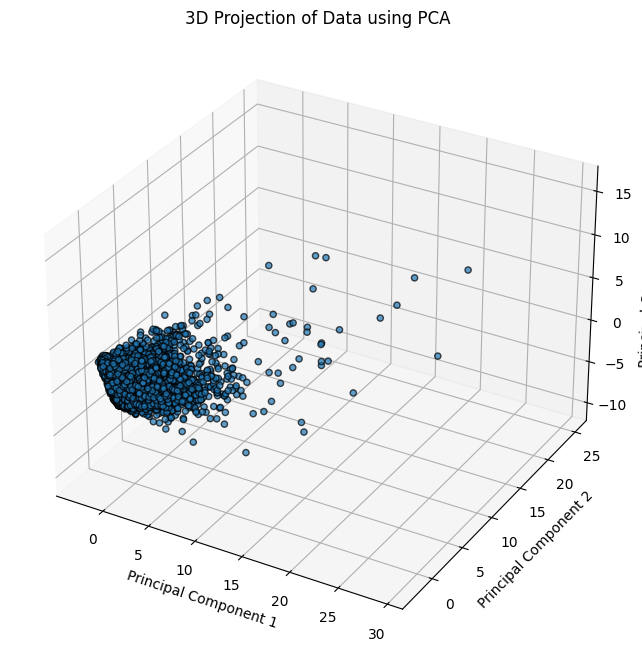

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import necessary for 3D plotting
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming your data is in a variable called 'X'
# X should be a 2D NumPy array with shape (number of samples, number of features)
# If your data is in a different format, you might need to preprocess it accordingly

# Standardize the data (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

# Apply PCA with n_components=3
pca = PCA(n_components=3)
principal_components = pca.fit_transform(X_scaled)

# Create a DataFrame or array with the principal components
# This will have shape (number of samples, 3)
# For example, if using pandas DataFrame:
# pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

# Visualize the 3D projection
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(principal_components[:, 0], principal_components[:, 1], principal_components[:, 2],
           marker='o', edgecolors='k', alpha=0.7)

ax.set_title('3D Projection of Data using PCA')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

##Feature Importance

Principal Component 1: 0.2723
Principal Component 2: 0.2037
Principal Component 3: 0.0892
Principal Component 4: 0.0757
Principal Component 5: 0.0628
Principal Component 6: 0.0571
Principal Component 7: 0.0492
Principal Component 8: 0.0421
Principal Component 9: 0.0368
Principal Component 10: 0.0308
Principal Component 11: 0.0236
Principal Component 12: 0.0177
Principal Component 13: 0.0143
Principal Component 14: 0.0118
Principal Component 15: 0.0101
Principal Component 16: 0.0027
Principal Component 17: 0.0000


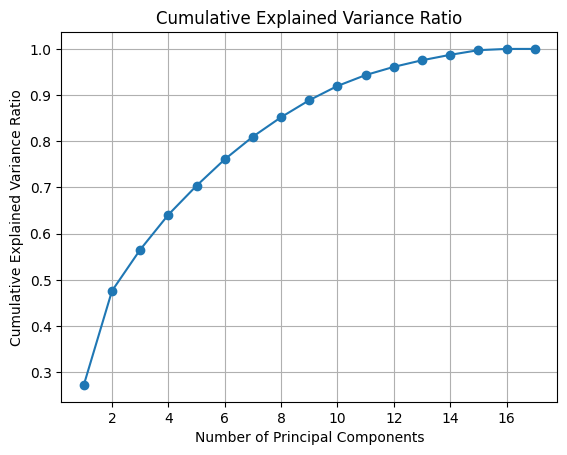

In [27]:
# Standardize the data (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

# Apply PCA
pca = PCA()
principal_components = pca.fit_transform(X_scaled)

# Get the explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Print or visualize the explained variance ratio
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Principal Component {i + 1}: {ratio:.4f}")

# Optionally, you can also plot a cumulative explained variance curve
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.title('Cumulative Explained Variance Ratio')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

## Scree Plot

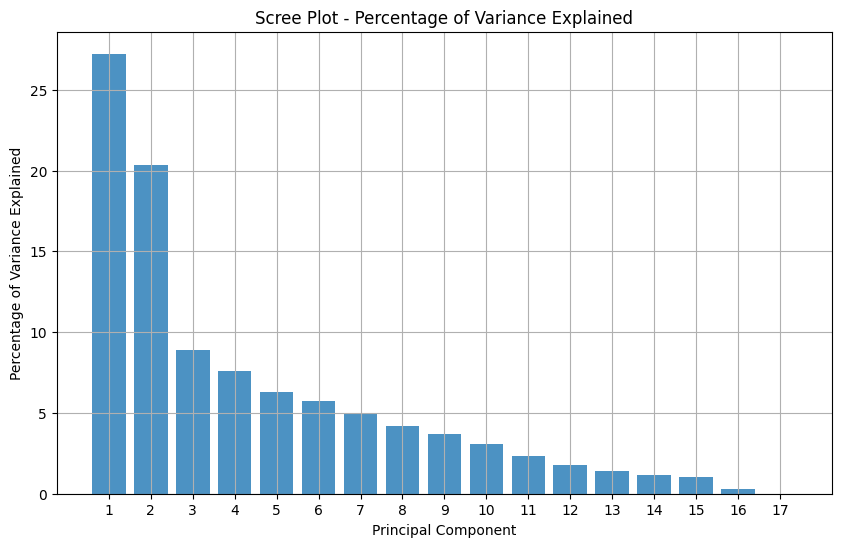

In [22]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

# Apply PCA
pca = PCA()
principal_components = pca.fit_transform(X_scaled)

# Get the explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the scree plot as a bar plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio * 100, align='center', alpha=0.8)
plt.title('Scree Plot - Percentage of Variance Explained')
plt.xlabel('Principal Component')
plt.ylabel('Percentage of Variance Explained')
plt.xticks(np.arange(1, len(explained_variance_ratio) + 1))
plt.grid(True)
plt.show()

##PCA : Number of Components

In [23]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

# Apply PCA
pca = PCA()
principal_components = pca.fit_transform(X_scaled)

# Get the explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Find the number of components that explain 95% of variance
n_components = np.argmax(cumulative_variance >= 0.95) + 1  # Add 1 to start from 1-indexed components

print(f"Number of components to explain 95% variance: {n_components}")

Number of components to explain 95% variance: 12


#Training a Clustering Model

##K-Means

###Finding The Number of clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

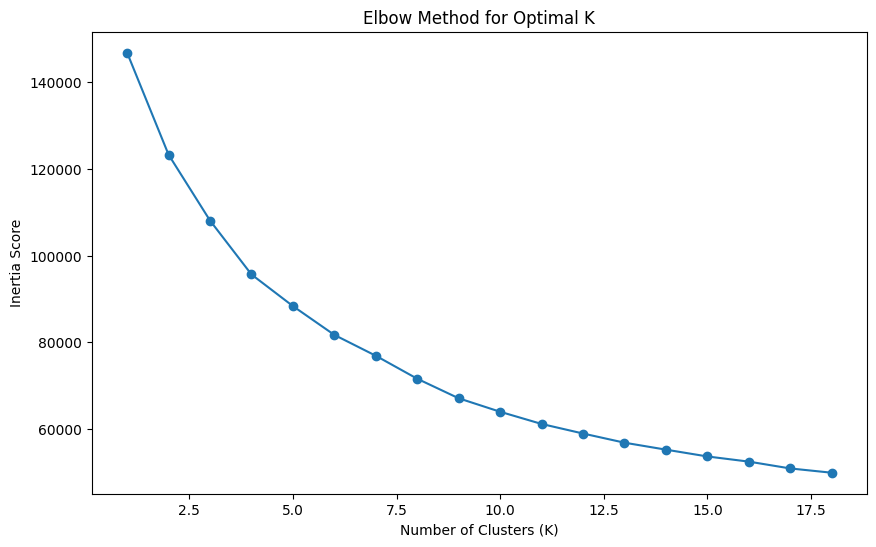

In [43]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline


k_values = range(1, 19)

# Create a pipeline with StandardScaler and KMeans
pipeline = make_pipeline(StandardScaler(), KMeans())

# Initialize lists to store inertia scores
inertia_scores = []

# Fit the model for different values of K
for k in k_values:
    pipeline.set_params(kmeans__n_clusters=k)
    pipeline.fit(data)

    # Append the inertia score to the list
    inertia_scores.append(pipeline.named_steps['kmeans'].inertia_)

# Plot the elbow method
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_scores, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia Score')
plt.show()

We Can See from the Elbow method that the K must between 3 - 5

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

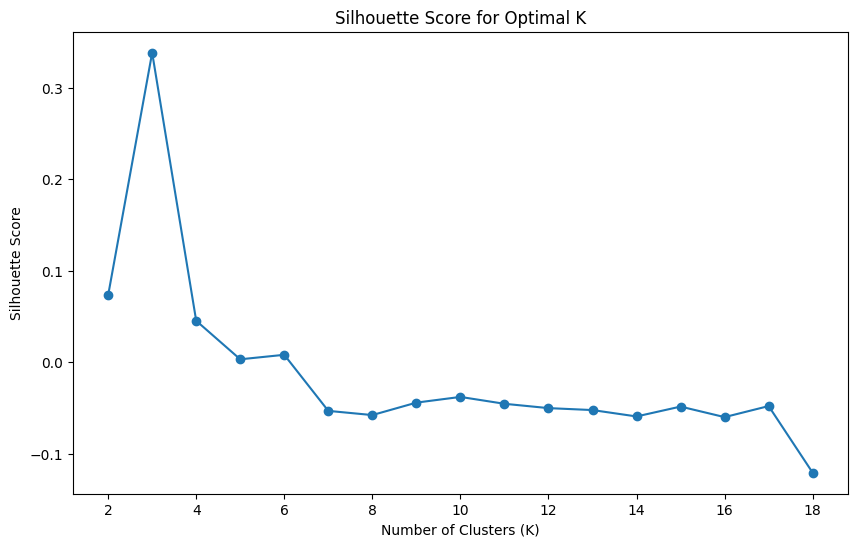

The best K based on silhouette score is: 3


In [45]:
from sklearn.metrics import silhouette_score

k_values = range(2, 19)  # Silhouette score requires at least two clusters

# Initialize lists to store silhouette scores
silhouette_scores = []

# Create a pipeline with StandardScaler and KMeans
pipeline = make_pipeline(StandardScaler(), KMeans())

# Fit the model for different values of K
for k in k_values:
    pipeline.set_params(kmeans__n_clusters=k)
    labels = pipeline.fit_predict(data)
    silhouette_avg = silhouette_score(data, labels)

    # Append the silhouette score to the list
    silhouette_scores.append(silhouette_avg)

# Find the best K based on the silhouette score
best_k = k_values[np.argmax(silhouette_scores)]

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()

print(f"The best K based on silhouette score is: {best_k}")

###Training The K-Means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


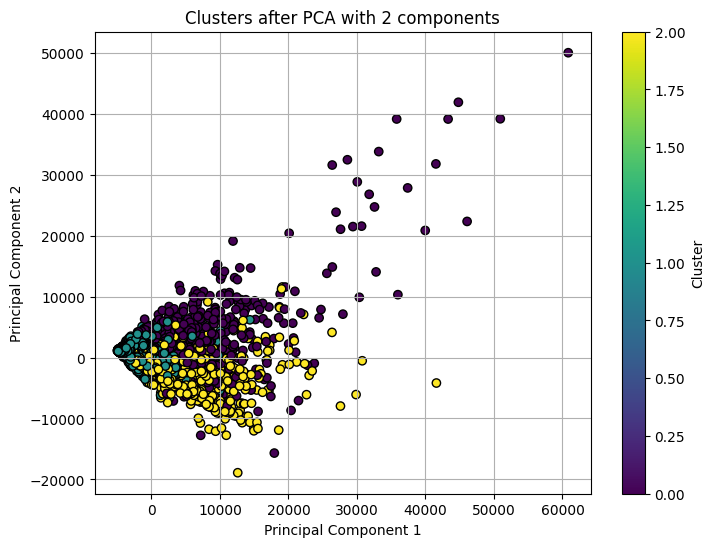

In [24]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=12)),
    ('kmeans', KMeans(n_clusters=3, random_state=42))
])


pipeline.fit(data)


pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(data)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=pipeline.named_steps['kmeans'].labels_, cmap='viridis', marker='o', edgecolors='k')
plt.title('Clusters after PCA with 2 components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()

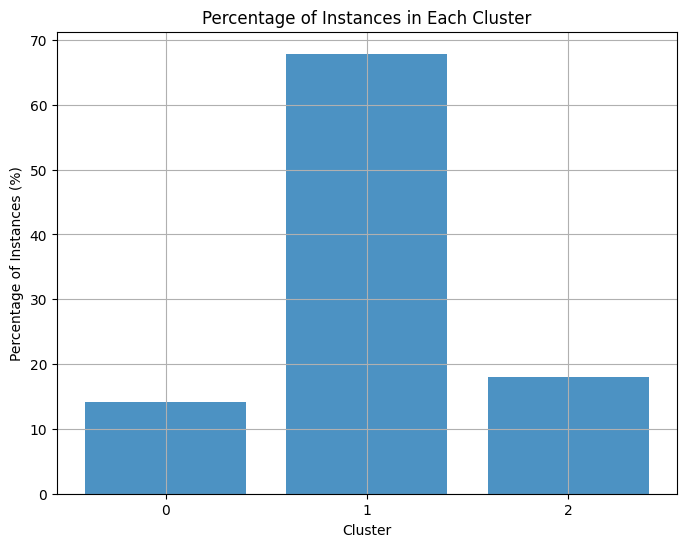

In [26]:
cluster_labels = pipeline.named_steps['kmeans'].labels_


cluster_counts = np.bincount(cluster_labels)


cluster_percentages = cluster_counts / len(data) * 100

plt.figure(figsize=(8, 6))
plt.bar(range(len(cluster_percentages)), cluster_percentages, align='center', alpha=0.8)
plt.xticks(range(len(cluster_percentages)), range(len(cluster_percentages)))
plt.xlabel('Cluster')
plt.ylabel('Percentage of Instances (%)')
plt.title('Percentage of Instances in Each Cluster')
plt.grid(True)
plt.show()

##DBSCAN

### DBSCAN: Finding eps

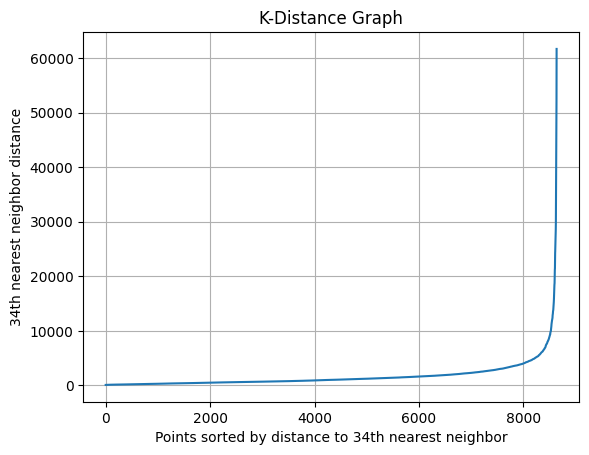

In [31]:
num_features = data.shape[1]
min_samples = 2 * num_features


nbrs = NearestNeighbors(n_neighbors=min_samples).fit(data)
distances, indices = nbrs.kneighbors(data)


distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.title('K-Distance Graph')
plt.xlabel('Points sorted by distance to {}th nearest neighbor'.format(min_samples))
plt.ylabel('{}th nearest neighbor distance'.format(min_samples))
plt.grid(True)
plt.show()

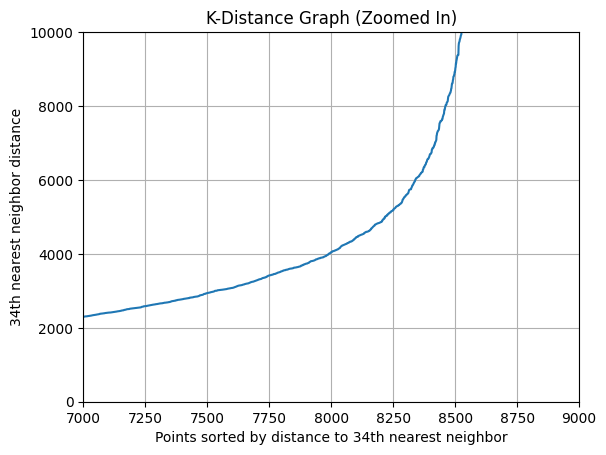

In [36]:
plt.plot(distances)
plt.title('K-Distance Graph (Zoomed In)')
plt.xlabel('Points sorted by distance to {}th nearest neighbor'.format(min_samples))
plt.ylabel('{}th nearest neighbor distance'.format(min_samples))
plt.grid(True)
plt.xlim(7000, 9000)
plt.ylim(0, 10000)
plt.show()

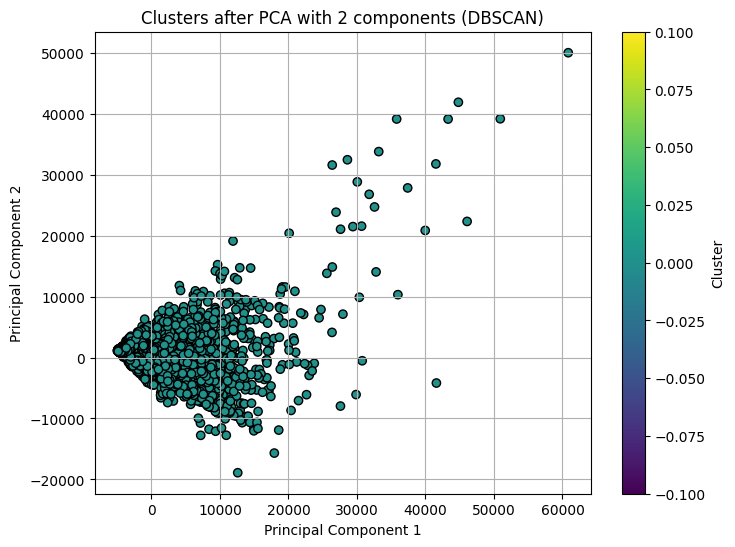

In [39]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=12)),
    ('dbscan', DBSCAN(eps=4000, min_samples=2 * data.shape[1]))
])


pipeline.fit(data)


pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(data)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=pipeline.named_steps['dbscan'].labels_, cmap='viridis', marker='o', edgecolors='k')
plt.title('Clusters after PCA with 2 components (DBSCAN)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()